# **Entrenamiento de Modelos**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV

import urllib.request
import pickle

In [37]:
plt.rcParams['figure.facecolor'] = '#EEF4F3'
plt.rcParams['axes.facecolor'] = '#EEF4F3'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
RANDOM_STATE = 10

## **Carga de datos pretratados**

In [28]:
X = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/X-preprocessed.p").read()
    )
y = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/y-preprocessed.p").read()
    )

## **Data split**

A continuación se divide la data en dos subconjuntos: uno para entrenamiento y otro para validación. Se decidió usar un ratio de 80%-20%

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
sample_weights_train = X_train.pop("fnlwgt")
sample_weights_test = X_test.pop("fnlwgt")

## **Regresión Logística**

In [31]:
reg_model = LogisticRegression(random_state=RANDOM_STATE).fit(X_train, y_train, sample_weight=sample_weights_train)
y_pred = reg_model.predict(X_test)
y_pred_proba = reg_model.predict_proba(X_test)[:,1]

**Guardando los resultados**

In [32]:
with open("regression-pred.p", "wb") as file:
    pickle.dump(y_pred, file)

with open("regression-pred-proba.p", "wb") as file:
    pickle.dump(y_pred_proba, file)

## **Árbol de clasificación**

Para este tipo de modelo, se decidió iterar un RandomForestClassifier variando los parámetros `` y `` y usando Cross Validation con 5 KFolds.

In [33]:
rf_classifier = RandomForestClassifier(random_state=RANDOM_STATE)

param_grid = {'n_estimators': np.linspace(200, 500, 5, dtype=int), 'max_depth': np.linspace(14, 30, 8, dtype=int)}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train, sample_weight=sample_weights_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': array([14, 16, 18, 20, 23, 25, 27, 30]),
                         'n_estimators': array([200, 275, 350, 425, 500])})

In [34]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [35]:
gs_res = pd.DataFrame.from_dict(grid_search.cv_results_)
gs_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.942697,0.088533,0.079014,0.002073,14,200,"{'max_depth': 14, 'n_estimators': 200}",0.833422,0.831283,0.830214,0.834225,0.827761,0.831381,0.002312,23
1,2.479168,0.021116,0.103572,0.001577,14,275,"{'max_depth': 14, 'n_estimators': 275}",0.832888,0.830481,0.831016,0.833690,0.826424,0.830900,0.002528,29
2,3.268129,0.130679,0.133521,0.003765,14,350,"{'max_depth': 14, 'n_estimators': 350}",0.833957,0.831016,0.829947,0.833957,0.826424,0.831060,0.002811,25
3,3.979716,0.225750,0.159716,0.001898,14,425,"{'max_depth': 14, 'n_estimators': 425}",0.833155,0.829947,0.830214,0.834492,0.826692,0.830900,0.002723,28
4,4.544952,0.058090,0.184498,0.001693,14,500,"{'max_depth': 14, 'n_estimators': 500}",0.833422,0.830481,0.830481,0.833155,0.827227,0.830953,0.002249,26
5,1.992617,0.025621,0.084781,0.000755,16,200,"{'max_depth': 16, 'n_estimators': 200}",0.834759,0.833957,0.831818,0.836096,0.828029,0.832932,0.002817,14
6,2.715298,0.024820,0.113368,0.000932,16,275,"{'max_depth': 16, 'n_estimators': 275}",0.833422,0.833690,0.831016,0.835294,0.828831,0.832451,0.002268,19
7,3.433385,0.032713,0.144749,0.002316,16,350,"{'max_depth': 16, 'n_estimators': 350}",0.834225,0.834225,0.832353,0.834759,0.828831,0.832879,0.002183,16
8,4.163164,0.023228,0.172542,0.001047,16,425,"{'max_depth': 16, 'n_estimators': 425}",0.832888,0.834759,0.832086,0.835561,0.827761,0.832611,0.002727,18
9,4.925423,0.039674,0.203693,0.001754,16,500,"{'max_depth': 16, 'n_estimators': 500}",0.832086,0.834492,0.831283,0.835829,0.827761,0.832290,0.002791,20


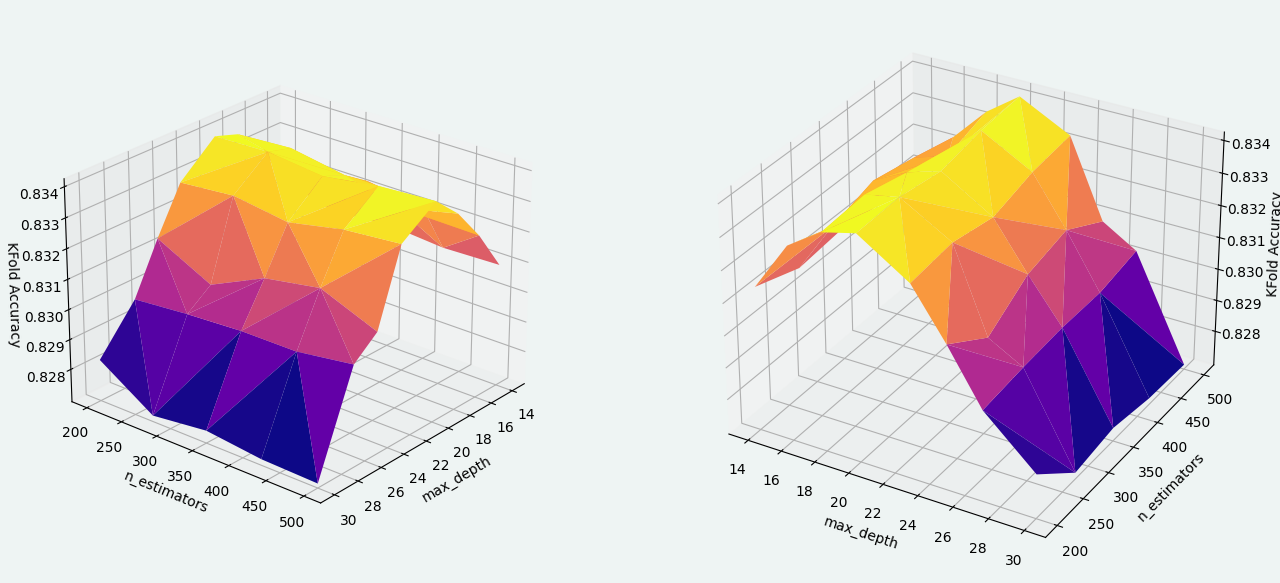

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), subplot_kw={'projection': '3d'})

ax1.set_box_aspect(aspect=None, zoom=0.9)

x = gs_res['param_max_depth'].astype("int")
y = gs_res['param_n_estimators'].astype("int")
z = gs_res['mean_test_score']

ax1.plot_trisurf(x, y, z, linewidth=0, antialiased=True, shade=False, cmap=cm.plasma)
ax1.set_xlabel('max_depth')
ax1.set_ylabel('n_estimators')
ax1.set_zlabel("KFold Accuracy")

ax1.view_init(elev=25, azim=110)

ax2.plot_trisurf(x, y, z, linewidth=0, antialiased=True, shade=False, cmap=cm.plasma)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('n_estimators')
ax2.set_zlabel("KFold Accuracy")
ax1.view_init(elev=25, azim=40)

plt.savefig("grid-search.png", dpi=300)

**Mejores hiperparámetros:**

In [42]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [43]:
with open("gs.p", "wb") as file:
    pickle.dump(grid_search, file)

**Guardando los resultados del mejor modelo del GridSearch**

In [44]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:,1]

In [45]:
with open("trees-pred.p", "wb") as file:
    pickle.dump(y_pred, file)

with open("trees-pred-proba.p", "wb") as file:
    pickle.dump(y_pred_proba, file)

## **KMeans**

In [64]:
kmeans = KMeans(n_clusters = 2, random_state=RANDOM_STATE)
kmeans.fit(X_train.astype(int).values)

KMeans(n_clusters=2, random_state=10)

In [65]:
y_pred_test = kmeans.predict(X_test.astype(int).values)

**Silhouette Score:**

In [66]:
silhouette_score(X_train.astype(int).values, kmeans.labels_)

0.5846944427112197

**Guardando la predicción de clases de KMeans:**

In [67]:
with open("kmeans-pred-train.p", "wb") as file:
    pickle.dump(y_pred_test, file)

with open("kmeans-pred-test.p", "wb") as file:
    pickle.dump(kmeans.labels_, file)